In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_dir=r'C:\Users\solharsh\Desktop\Data Science\Machine Learning\Jigsaw\K-Means\Data - K-Means\Data - K-Means'

In [3]:
os.chdir(data_dir)

In [4]:
data = pd.read_csv("kc_housingdata.csv")

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [10]:
## Choose columns that are numeric and have a numeric interpretation
data_num=data[['price','bedrooms','bathrooms','sqft_living','floors','sqft_living15','sqft_lot15','sqft_basement','yr_built','condition']]

In [12]:
data_num.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
floors           float64
sqft_living15      int64
sqft_lot15         int64
sqft_basement      int64
yr_built           int64
condition          int64
dtype: object

In [17]:
#Scale the data using pandas #Scaled using z scaling
def scale(x):
    return (x-np.mean(x)/np.std(x))

data_scaled = data_num.apply(scale,axis=0)
data_scaled.head()



,price,bedrooms,bathrooms,sqft_living,floors,sqft_living15,sqft_lot15,sqft_basement,yr_built,condition
0,221898.528846,-0.624404,-1.74592,1177.735349,-1.76736,1337.101512,5649.532352,-0.658681,1887.89677,-2.239408
1,537998.528846,-0.624404,-0.49592,2567.735349,-0.76736,1687.101512,7638.532352,399.341319,1883.89677,-2.239408
2,179998.528846,-1.624404,-1.74592,767.735349,-1.76736,2717.101512,8061.532352,-0.658681,1865.89677,-2.239408
3,603998.528846,0.375596,0.25408,1957.735349,-1.76736,1357.101512,4999.532352,909.341319,1897.89677,-0.239408
4,509998.528846,-0.624404,-0.74592,1677.735349,-1.76736,1797.101512,7502.532352,-0.658681,1919.89677,-2.239408


In [19]:
#Scale the data using sklearn

import sklearn.preprocessing as preprocessing
dat_scaled = preprocessing.scale(data_num,axis=0)

In [20]:
print(dat_scaled)
print("Type of output is "+str(type(dat_scaled)))
print("Shape of the object is"+str(dat_scaled.shape))

[[-0.86671733 -0.39873715 -1.44746357 ... -0.65868104 -0.54489777
  -0.62918687]
 [-0.00568792 -0.39873715  0.1756067  ...  0.2451414  -0.6810785
  -0.62918687]
 [-0.98084935 -1.47395936 -1.44746357 ... -0.65868104 -1.29389179
  -0.62918687]
 ...
 [-0.37586519 -1.47395936 -1.77207762 ... -0.65868104  1.29354209
  -0.62918687]
 [-0.38158814 -0.39873715  0.50022075 ... -0.65868104  1.12331618
  -0.62918687]
 [-0.58588173 -1.47395936 -1.77207762 ... -0.65868104  1.25949691
  -0.62918687]]
Type of output is <class 'numpy.ndarray'>
Shape of the object is(21613, 10)


In [21]:
#Create a cluster model
import sklearn.cluster as cluster

In [23]:
#Instantiating k means object 
kmeans = cluster.KMeans(n_clusters=3,init="k-means++")
kmeans=kmeans.fit(dat_scaled) 

In [24]:
kmeans.labels_ #which row in data belongs to which cluster

array([1, 0, 1, ..., 1, 0, 1])

In [26]:
kmeans.cluster_centers_ 

array([[-0.10520854,  0.04715512,  0.47453017,  0.12372929,  1.01931796,
         0.17512445, -0.0788251 , -0.52443053,  0.90042115, -0.47927728],
       [-0.36757677, -0.34956183, -0.67831679, -0.56885178, -0.70536203,
        -0.51295973, -0.07675929, -0.04764151, -0.61117775,  0.26036549],
       [ 1.2930508 ,  0.95475047,  1.13732196,  1.46592806,  0.20054548,
         1.20320321,  0.37620512,  1.12156351,  0.14162785,  0.11838284]])

In [42]:
## Elbow method
from scipy.spatial.distance import cdist
K=range(1,30)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(dat_scaled)
    wss.append(sum(np.min(cdist(dat_scaled, kmeans.cluster_centers_, 'euclidean'), 
                                      axis=1)) / dat_scaled.shape[0])


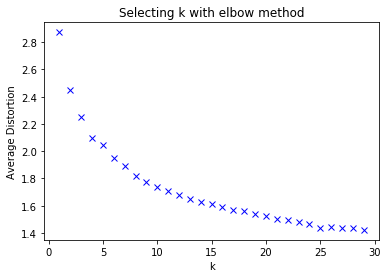

In [43]:
plt.plot(K, wss, 'bx')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with elbow method')
plt.show()

In [46]:
import sklearn.metrics as metrics
labels = cluster.KMeans(n_clusters=8, random_state=200).fit(dat_scaled).labels_
metrics.silhouette_score(dat_scaled,lables,metric="euclidean",sample_size=10000,random_state=200) #computationally expensive
#that is why, we are taking only sample size of 10000 for silhouette 

#not optimal score as it is close to 0, it should be closer to 1

0.19160823388589887

In [52]:
for i in range(7,13): #as the scree plot flattens out between this range
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(dat_scaled).labels_
    print("Silhouette score for k is "+str(i)+" is "+str(metrics.silhouette_score(dat_scaled,lables,metric="euclidean",sample_size=10000,random_state=200))) #computationally expensive


Silhouette score for k is 7 is 0.19160823388589887
Silhouette score for k is 8 is 0.19160823388589887
Silhouette score for k is 9 is 0.19160823388589887
Silhouette score for k is 10 is 0.19160823388589887
Silhouette score for k is 11 is 0.19160823388589887
Silhouette score for k is 12 is 0.19160823388589887


In [53]:
#let's try to find the cluster profiles to find what each cluster in this module signifies
import os
data_dir=r'C:\Users\solharsh\Desktop\Data Science\Machine Learning\Jigsaw\K-Means\Data - K-Means\Data - K-Means'
os.chdir(data_dir)

In [55]:
import cluster_profiles as cluster_profiles

In [56]:
#let's look for profiles for 8,9,10 clusters
kmeans = cluster.KMeans(n_clusters=8, random_state=200).fit(dat_scaled)

In [57]:
cluster_profiles.get_zprofiles(data=data_num.copy(),kmeans=kmeans) #3.27 determine that the price in 1st cluster is 3 deviations
#above the mean

,price,bedrooms,bathrooms,sqft_living,floors,sqft_living15,sqft_lot15,sqft_basement,yr_built,condition,Size
Labels,,,,,,,,,,,
0,3.271241,1.077033,1.950198,2.643473,0.694785,2.120683,0.206341,1.495577,0.349990,-0.034076,816
1,-0.319780,-0.088615,-0.234905,-0.309564,-0.787977,-0.256293,-0.072097,0.144902,-0.098170,-0.659808,3110
2,-0.317747,-0.296392,0.355949,-0.301038,1.195786,-0.327555,-0.245102,-0.514570,0.943662,-0.509399,4003
3,-0.335464,-0.261238,-0.638220,-0.563937,-0.643435,-0.502298,-0.098543,-0.225744,-0.615744,1.341430,3871
4,-0.520016,-0.988274,-1.309980,-1.028448,-0.701086,-0.820283,-0.176155,-0.526439,-1.035354,-0.439736,3115
5,0.455937,0.663501,0.832379,0.988806,0.915163,1.104220,0.042563,-0.422402,0.827203,-0.419392,3648
6,0.288838,0.819314,0.411044,0.579956,-0.574951,0.248492,-0.056372,1.602214,-0.460734,0.671371,2785
7,0.180692,-0.110656,0.317695,0.660391,0.129340,0.592938,7.429800,-0.070726,0.439319,-0.165261,265


In [58]:
cluster_profiles.get_profiles(data=data_num.copy(),kmeans=kmeans)

,price,bedrooms,bathrooms,sqft_living,floors,sqft_living15,sqft_lot15,sqft_basement,yr_built,condition,Size
Labels,,,,,,,,,,,
0,3.223640,1.297168,1.710233,2.167303,1.251070,1.731668,1.441242,3.270616,1.005216,0.993496,816
1,0.782628,0.975550,0.914451,0.863303,0.715254,0.911575,0.845827,1.219994,0.998537,0.874065,3110
2,0.784010,0.918221,1.129631,0.867068,1.432113,0.886988,0.475873,0.218769,1.014063,0.902773,4003
3,0.771967,0.927921,0.767570,0.750977,0.767486,0.826699,0.789275,0.657271,0.990824,1.256033,3871
4,0.646517,0.727321,0.522925,0.545858,0.746653,0.716990,0.623308,0.200749,0.984570,0.916070,3115
5,1.309925,1.183069,1.303140,1.436636,1.330707,1.380973,1.091017,0.358700,1.012328,0.919952,3648
6,1.196339,1.226060,1.149696,1.256096,0.792234,1.085734,0.879453,3.432514,0.993134,1.128142,2785
7,1.122826,0.969468,1.115700,1.291615,1.046739,1.204573,16.887951,0.892623,1.006547,0.968457,265
